# Machine learning and  Data streaming|

In [368]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [369]:
data = pd.read_csv('data/combined_data.csv')

In [370]:
data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Social support,Year,Country or region
0,1,7.587,0.03411,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738,1.34951,2015,Switzerland
1,2,7.561,0.04884,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201,1.40223,2015,Iceland
2,3,7.527,0.03328,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204,1.36058,2015,Denmark
3,4,7.522,0.03880,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531,1.33095,2015,Norway
4,5,7.427,0.03553,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176,1.32261,2015,Canada


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 781 non-null    int64  
 1   Happiness Score                781 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       781 non-null    float64
 4   Health (Life Expectancy)       781 non-null    float64
 5   Freedom                        781 non-null    float64
 6   Trust (Government Corruption)  781 non-null    float64
 7   Generosity                     781 non-null    float64
 8   Dystopia Residual              470 non-null    float64
 9   Social support                 781 non-null    float64
 10  Year                           781 non-null    int64  
 11  Country or region              781 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 7

In [372]:
data.isnull().sum()

Happiness Rank                     0
Happiness Score                    0
Standard Error                   623
Economy (GDP per Capita)           0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                311
Social support                     0
Year                               0
Country or region                  0
dtype: int64

In [373]:
data = data.drop(columns= ['Standard Error', 'Dystopia Residual'])

In [374]:
data.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Social support,Year,Country or region
0,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,1.34951,2015,Switzerland
1,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,1.40223,2015,Iceland
2,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,1.36058,2015,Denmark
3,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,1.33095,2015,Norway
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,1.32261,2015,Canada


In [375]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()


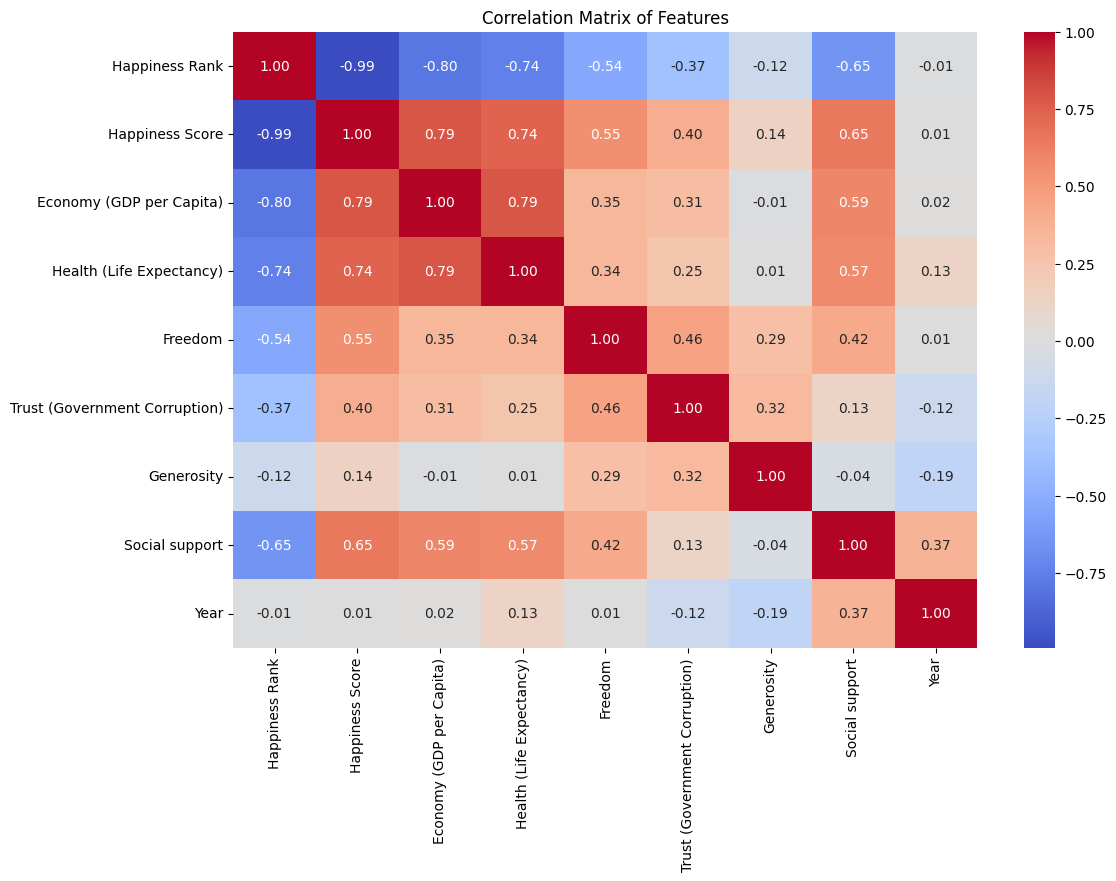

In [376]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

In [377]:
data.columns = data.columns.str.replace(r'[^A-Za-z0-9]+', '_', regex=True).str.upper()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HAPPINESS_RANK                781 non-null    int64  
 1   HAPPINESS_SCORE               781 non-null    float64
 2   ECONOMY_GDP_PER_CAPITA_       781 non-null    float64
 3   HEALTH_LIFE_EXPECTANCY_       781 non-null    float64
 4   FREEDOM                       781 non-null    float64
 5   TRUST_GOVERNMENT_CORRUPTION_  781 non-null    float64
 6   GENEROSITY                    781 non-null    float64
 7   SOCIAL_SUPPORT                781 non-null    float64
 8   YEAR                          781 non-null    int64  
 9   COUNTRY_OR_REGION             781 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 61.1+ KB


In [378]:
data.head()

,HAPPINESS_RANK,HAPPINESS_SCORE,ECONOMY_GDP_PER_CAPITA_,HEALTH_LIFE_EXPECTANCY_,FREEDOM,TRUST_GOVERNMENT_CORRUPTION_,GENEROSITY,SOCIAL_SUPPORT,YEAR,COUNTRY_OR_REGION
0,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,1.34951,2015,Switzerland
1,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,1.40223,2015,Iceland
2,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,1.36058,2015,Denmark
3,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,1.33095,2015,Norway
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,1.32261,2015,Canada


In [379]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns= ['HAPPINESS_SCORE'],  axis=1), data['HAPPINESS_SCORE'], test_size=0.3, random_state=42)

In [380]:
X_test.to_csv('data/x_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

## Transformations

In [381]:
def continents(df):
    country_to_continent = {
        'Switzerland': 'EUROPE',
        'Iceland': 'EUROPE',
        'Denmark': 'EUROPE',
        'Norway': 'EUROPE',
        'Finland': 'EUROPE',
        'Netherlands': 'EUROPE',
        'Sweden': 'EUROPE',
        'Austria': 'EUROPE',
        'Luxembourg': 'EUROPE',
        'Ireland': 'EUROPE',
        'Belgium': 'EUROPE',
        'United Kingdom': 'EUROPE',
        'Germany': 'EUROPE',
        'France': 'EUROPE',
        'Czech Republic': 'EUROPE',
        'Spain': 'EUROPE',
        'Malta': 'EUROPE',
        'Slovakia': 'EUROPE',
        'Italy': 'EUROPE',
        'Moldova': 'EUROPE',
        'Slovenia': 'EUROPE',
        'Lithuania': 'EUROPE',
        'Russia': 'EUROPE',
        'North Cyprus': 'EUROPE',
        'Cyprus': 'EUROPE',
        'Kosovo': 'EUROPE',
        'Estonia': 'EUROPE',
        'Montenegro': 'EUROPE',
        'Romania': 'EUROPE',
        'Serbia': 'EUROPE',
        'Portugal': 'EUROPE',
        'Latvia': 'EUROPE',
        'Macedonia': 'EUROPE',
        'Albania': 'EUROPE',
        'Bosnia and Herzegovina': 'EUROPE',
        'Greece': 'EUROPE',
        'Hungary': 'EUROPE',
        'Bulgaria': 'EUROPE',
        'Ukraine': 'EUROPE',
        'Belarus': 'EUROPE',
        'Croatia': 'EUROPE',
        'Poland': 'EUROPE',
        'North Macedonia': 'EUROPE',
        'Puerto Rico': 'NORTH AMERICA',
        'Canada': 'NORTH AMERICA',
        'Costa Rica': 'NORTH AMERICA',
        'Mexico': 'NORTH AMERICA',
        'United States': 'NORTH AMERICA',
        'Panama': 'NORTH AMERICA',
        'Trinidad and Tobago': 'NORTH AMERICA',
        'El Salvador': 'NORTH AMERICA',
        'Guatemala': 'NORTH AMERICA',
        'Nicaragua': 'NORTH AMERICA',
        'Jamaica': 'NORTH AMERICA',
        'Dominican Republic': 'NORTH AMERICA',
        'Honduras': 'NORTH AMERICA',
        'Haiti': 'NORTH AMERICA',
        'Brazil': 'SOUTH AMERICA',
        'Venezuela': 'SOUTH AMERICA',
        'Chile': 'SOUTH AMERICA',
        'Argentina': 'SOUTH AMERICA',
        'Uruguay': 'SOUTH AMERICA',
        'Colombia': 'SOUTH AMERICA',
        'Ecuador': 'SOUTH AMERICA',
        'Bolivia': 'SOUTH AMERICA',
        'Paraguay': 'SOUTH AMERICA',
        'Peru': 'SOUTH AMERICA',
        'Suriname': 'SOUTH AMERICA',
        'New Zealand': 'OCEANIA',
        'Australia': 'OCEANIA',
        'Israel': 'ASIA',
        'United Arab Emirates': 'ASIA',
        'Oman': 'ASIA',
        'Singapore': 'ASIA',
        'Qatar': 'ASIA',
        'Thailand': 'ASIA',
        'Saudi Arabia': 'ASIA',
        'Taiwan': 'ASIA',
        'Kuwait': 'ASIA',
        'Uzbekistan': 'ASIA',
        'Japan': 'ASIA',
        'South Korea': 'ASIA',
        'Bahrain': 'ASIA',
        'Kazakhstan': 'ASIA',
        'Malaysia': 'ASIA',
        'Turkmenistan': 'ASIA',
        'Hong Kong': 'ASIA',
        'Indonesia': 'ASIA',
        'Vietnam': 'ASIA',
        'Turkey': 'ASIA',
        'Kyrgyzstan': 'ASIA',
        'Bhutan': 'ASIA',
        'Azerbaijan': 'ASIA',
        'Pakistan': 'ASIA',
        'Jordan': 'ASIA',
        'China': 'ASIA',
        'Philippines': 'ASIA',
        'Laos': 'ASIA',
        'Mongolia': 'ASIA',
        'Lebanon': 'ASIA',
        'Tajikistan': 'ASIA',
        'Palestinian Territories': 'ASIA',
        'Bangladesh': 'ASIA',
        'Iran': 'ASIA',
        'Iraq': 'ASIA',
        'India': 'ASIA',
        'Myanmar': 'ASIA',
        'Georgia': 'ASIA',
        'Sri Lanka': 'ASIA',
        'Yemen': 'ASIA',
        'Armenia': 'ASIA',
        'Cambodia': 'ASIA',
        'Afghanistan': 'ASIA',
        'Syria': 'ASIA',
        'Libya': 'AFRICA',
        'Mauritius': 'AFRICA',
        'Nigeria': 'AFRICA',
        'Zambia': 'AFRICA',
        'Somaliland region': 'AFRICA',
        'Morocco': 'AFRICA',
        'Mozambique': 'AFRICA',
        'Swaziland': 'AFRICA',
        'South Africa': 'AFRICA',
        'Ghana': 'AFRICA',
        'Zimbabwe': 'AFRICA',
        'Liberia': 'AFRICA',
        'Sudan': 'AFRICA',
        'Congo (Kinshasa)': 'AFRICA',
        'Ethiopia': 'AFRICA',
        'Sierra Leone': 'AFRICA',
        'Mauritania': 'AFRICA',
        'Kenya': 'AFRICA',
        'Djibouti': 'AFRICA',
        'Malawi': 'AFRICA',
        'Cameroon': 'AFRICA',
        'Egypt': 'AFRICA',
        'Angola': 'AFRICA',
        'Mali': 'AFRICA',
        'Congo (Brazzaville)': 'AFRICA',
        'Comoros': 'AFRICA',
        'Uganda': 'AFRICA',
        'Senegal': 'AFRICA',
        'Gabon': 'AFRICA',
        'Niger': 'AFRICA',
        'Tanzania': 'AFRICA',
        'Madagascar': 'AFRICA',
        'Central African Republic': 'AFRICA',
        'Chad': 'AFRICA',
        'Guinea': 'AFRICA',
        'Ivory Coast': 'AFRICA',
        'Burkina Faso': 'AFRICA',
        'Rwanda': 'AFRICA',
        'Benin': 'AFRICA',
        'Burundi': 'AFRICA',
        'Togo': 'AFRICA',
        'Namibia': 'AFRICA',
        'Algeria': 'AFRICA',
        'Belize': 'NORTH AMERICA',
        'Northern Cyprus': 'EUROPE',
        'Lesotho': 'AFRICA',
        'Botswana': 'AFRICA',
        'South Sudan': 'AFRICA',
        'Somalia': 'AFRICA',
        'Tunisia': 'AFRICA',
        'Nepal': 'ASIA',
        'Gambia': 'AFRICA',
        'Taiwan Province of China': 'ASIA',
        'Hong Kong S.A.R., China': 'ASIA',
        'Trinidad & Tobago': 'NORTH AMERICA'
    }

    df['CONTINENT'] = df['COUNTRY_OR_REGION'].map(country_to_continent)
    return df

In [382]:
X_train = continents(X_train)
X_test = continents(X_test)
data = continents(data)

In [383]:
X_train.head()

,HAPPINESS_RANK,ECONOMY_GDP_PER_CAPITA_,HEALTH_LIFE_EXPECTANCY_,FREEDOM,TRUST_GOVERNMENT_CORRUPTION_,GENEROSITY,SOCIAL_SUPPORT,YEAR,COUNTRY_OR_REGION,CONTINENT
636,12,1.034000,0.963000,0.558000,0.093000,0.144000,1.441000,2019,Costa Rica,NORTH AMERICA
623,155,0.024000,0.010000,0.305000,0.038000,0.218000,0.000000,2018,Central African Republic,AFRICA
334,20,1.252785,0.819480,0.376895,0.082288,0.326662,1.284025,2017,Chile,SOUTH AMERICA
363,49,1.281778,0.547349,0.373783,0.032963,0.052264,1.469282,2017,Russia,EUROPE
626,2,1.383000,0.996000,0.592000,0.410000,0.252000,1.573000,2019,Denmark,EUROPE


In [384]:
def contients_dummies(df):
    df = pd.get_dummies(df, columns=['CONTINENT'], drop_first=True)
    df = df.drop(columns=['COUNTRY_OR_REGION'])
    df.replace({False: 0, True: 1}, inplace=True)
    return df

In [385]:
X_train = contients_dummies(X_train)
X_test = contients_dummies(X_test)
data = contients_dummies(data)

C:\Users\dayan\AppData\Local\Temp\ipykernel_32812\2296360007.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)
C:\Users\dayan\AppData\Local\Temp\ipykernel_32812\2296360007.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)
C:\Users\dayan\AppData\Local\Temp\ipykernel_32812\2296360007.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

In [386]:
X_train.head()

,HAPPINESS_RANK,ECONOMY_GDP_PER_CAPITA_,HEALTH_LIFE_EXPECTANCY_,FREEDOM,TRUST_GOVERNMENT_CORRUPTION_,GENEROSITY,SOCIAL_SUPPORT,YEAR,CONTINENT_ASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA
636,12,1.034000,0.963000,0.558000,0.093000,0.144000,1.441000,2019,0,0,1,0,0
623,155,0.024000,0.010000,0.305000,0.038000,0.218000,0.000000,2018,0,0,0,0,0
334,20,1.252785,0.819480,0.376895,0.082288,0.326662,1.284025,2017,0,0,0,0,1
363,49,1.281778,0.547349,0.373783,0.032963,0.052264,1.469282,2017,0,1,0,0,0
626,2,1.383000,0.996000,0.592000,0.410000,0.252000,1.573000,2019,0,1,0,0,0


## Train and evaluate models

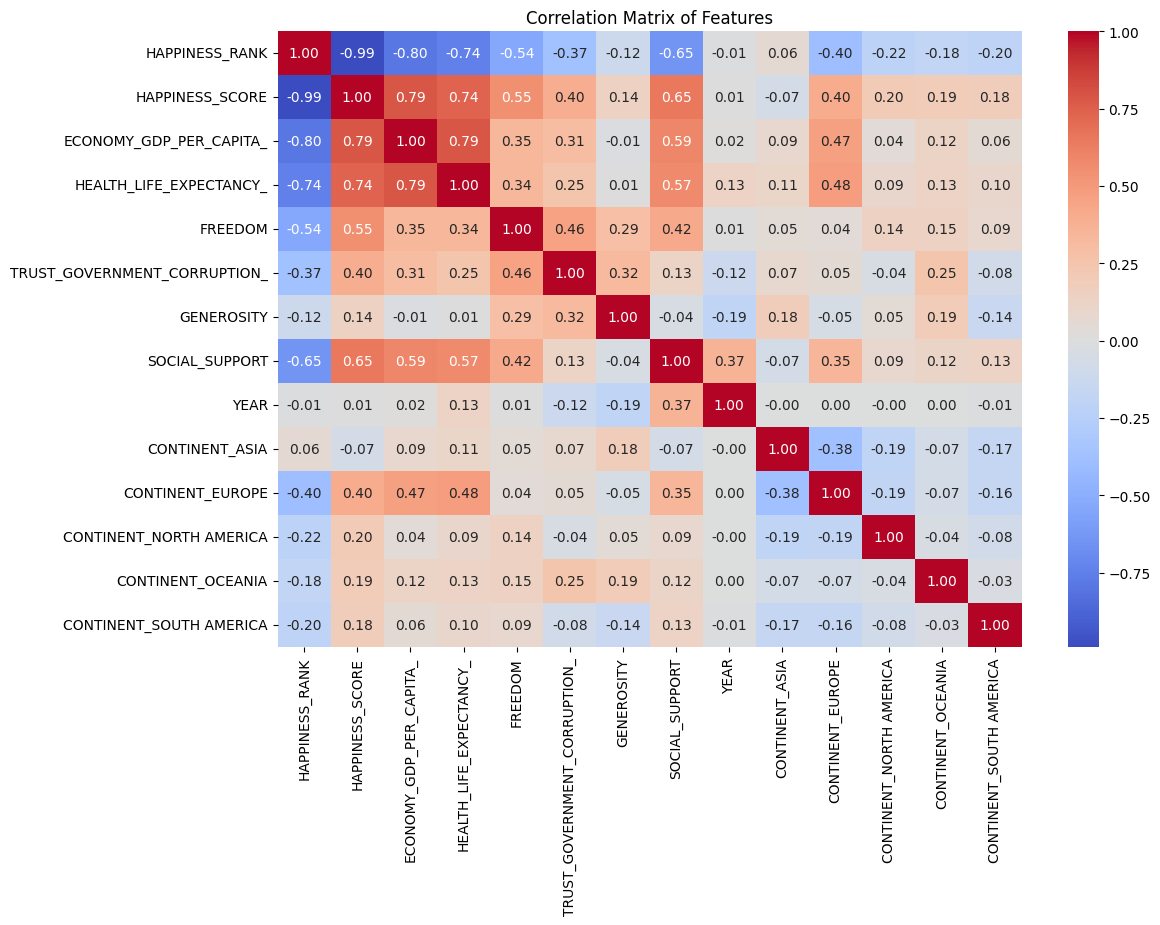

In [388]:
correlation_matrix = data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

In [389]:
def select_features (df):
    df = df.drop(columns = ['HAPPINESS_RANK', 'YEAR'], axis=1)
    return df

In [390]:
X_test = select_features(X_test)
X_train = select_features(X_train)

In [391]:
X_test.head()

,ECONOMY_GDP_PER_CAPITA_,HEALTH_LIFE_EXPECTANCY_,FREEDOM,TRUST_GOVERNMENT_CORRUPTION_,GENEROSITY,SOCIAL_SUPPORT,CONTINENT_ASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA
595,0.308,0.391,0.452,0.146,0.220,0.950,0,0,0,0,0
587,0.874,0.365,0.519,0.064,0.051,1.281,0,0,0,0,0
543,0.652,0.424,0.334,0.113,0.216,0.810,1,0,0,0,0
645,1.503,0.825,0.598,0.182,0.262,1.310,1,0,0,0,0
487,1.398,0.819,0.547,0.133,0.291,1.471,0,0,1,0,0


In [392]:
# Verify the lengths of X_train and y_train
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")

Length of X_train: 546
Length of y_train: 546


In [393]:
X_train.head()

,ECONOMY_GDP_PER_CAPITA_,HEALTH_LIFE_EXPECTANCY_,FREEDOM,TRUST_GOVERNMENT_CORRUPTION_,GENEROSITY,SOCIAL_SUPPORT,CONTINENT_ASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA
636,1.034000,0.963000,0.558000,0.093000,0.144000,1.441000,0,0,1,0,0
623,0.024000,0.010000,0.305000,0.038000,0.218000,0.000000,0,0,0,0,0
334,1.252785,0.819480,0.376895,0.082288,0.326662,1.284025,0,0,0,0,1
363,1.281778,0.547349,0.373783,0.032963,0.052264,1.469282,0,1,0,0,0
626,1.383000,0.996000,0.592000,0.410000,0.252000,1.573000,0,1,0,0,0


In [394]:
# Linear Regression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
y_pred_linear = linearModel.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Results:")
print("Mean Squared Error (MSE):", mse_linear)
print("Coefficient of determination (R²):", r2_linear)

Linear Regression Model Results:
Mean Squared Error (MSE): 0.2750301963936654
Coefficient of determination (R²): 0.7797452278701514


In [395]:
# Random Forest
randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest.fit(X_train, y_train)
y_pred_rf = randomForest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", mse_rf)
print("Coefficient of determination (R²):", r2_rf)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 0.204113145423792
Coefficient of determination (R²): 0.8365383331593351


In [396]:
# Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print("Gradient Boosting Regression Model Results:")
print("Mean Squared Error (MSE):", mse_gradient_boosting)
print("Coefficient of determination (R²):", r2_gradient_boosting)

Gradient Boosting Regression Model Results:
Mean Squared Error (MSE): 0.20348507971737131
Coefficient of determination (R²): 0.8370413123625796


In [397]:
joblib.dump(randomForest, '../model/RandomForestModel.pkl')

['../model/RandomForestModel.pkl']